# Netflix Shows & Movies EDA

#### Within this notebook I will cover:
- Understanding what content is available in different countries
- Identifying similar content by matching text-based features
- Network analysis of Actors / Directors and find interesting insights
- Does Netflix has more focus on TV Shows than movies in recent years.

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import joblib
## Also import Make Regression from SkLearn - https://www.codespeedy.com/make_regression-function-in-sklearn-with-python/#:~:text=make_regression%20%28%29%20function%20in%20scikit%20learn%20It%20is,in%20python%20below.%20Code%20in%20Python%20programming%20language

In [3]:
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\1. Netflix (Personal Proj) - ML Focus\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

#### Manipulation

In [5]:
# Make columns callable for future reference
cols = df.columns
list(cols)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [6]:
# Count amount of null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Converting date-related data into datetime, to make it formatted to refer to for analysis
# Creating 2 new columns - Year & month, to open more analysis opportunities and more perspectives of date analysis
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# We want to move the columns since the new date columns are at the end 
# Having simillar data next to each other makes it easier to refer to}
d_a = df['date_added']
r_y = df['release_year']
moving_cols = ['r_y', 'd_a']

df = df[[c for c in df if c not in moving_cols] # You can manually write out the columns in the order you want
        + [c for c in moving_cols if c in df]] # This method save time - better for larger datasets

In [8]:
df_nona = df.copy()
cols_redux = df_nona.columns # New variable containing updated columns

In [9]:
df_nona.dropna().shape

(5332, 14)

## EDA

In [10]:
df_nona.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0


In [11]:
# Print columns to get more aspects of the data to analyse
list(cols_redux) # List makes it easier to read

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'year_added',
 'month_added']

### TV Shows vs Movies - Distribution & C.O.T

In [12]:
# Distribution of content via type
movies = df_nona.loc[df_nona['type'] == 'Movie']
movies_c = movies.shape[0]
tv_shows = df_nona.loc[df_nona['type'] == 'TV Show']
tv_shows_c = tv_shows.shape[0]

([<matplotlib.patches.Wedge at 0x2bb1896e5f8>,
 [Text(-0.6357552620136555, 0.897672126570692, 'movies'),
  Text(0.6357552620136554, -0.8976721265706921, 'tv_shows')])

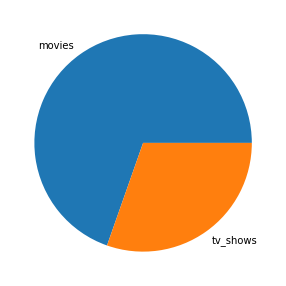

In [13]:
# Distribution Pie
plt.figure(figsize= (10,5))
labels = ['movies', 'tv_shows']
plt.pie([movies_c, tv_shows_c], labels=labels)

In [14]:
# Looking at content type over time
uni_ryear = df_nona.sort_values('release_year')
uni_ryear = uni_ryear.release_year.unique()
uni_ryear

array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [17]:
# Seperating count of movies and shows over the years
movies_ot = [len(movies.loc[movies['release_year'] == 1925]), len(movies.loc[movies['release_year'] == 1942]), len(movies.loc[movies['release_year'] == 1943]), len(movies.loc[movies['release_year'] == 1944]), len(movies.loc[movies['release_year']==1945]), len(movies.loc[movies['release_year'] == 1946]), len(movies.loc[movies['release_year'] == 1947]),
             len(movies.loc[movies['release_year'] == 1954]), len(movies.loc[movies['release_year'] == 1955]), len(movies.loc[movies['release_year'] == 1956]), len(movies.loc[movies['release_year'] == 1958]), len(movies.loc[movies['release_year']==1959]),
             len(movies.loc[movies['release_year'] == 1960]), len(movies.loc[movies['release_year'] == 1961]), len(movies.loc[movies['release_year'] == 1962]), len(movies.loc[movies['release_year'] == 1963]), len(movies.loc[movies['release_year']==1964]), len(movies.loc[movies['release_year'] == 1965]), len(movies.loc[movies['release_year'] == 1966]), len(movies.loc[movies['release_year'] == 1967]), len(movies.loc[movies['release_year'] == 1968]), len(movies.loc[movies['release_year'] == 1969]),
             len(movies.loc[movies['release_year'] == 1970]), len(movies.loc[movies['release_year'] == 1971]), len(movies.loc[movies['release_year'] == 1972]), len(movies.loc[movies['release_year'] == 1973]), len(movies.loc[movies['release_year']==1974]), len(movies.loc[movies['release_year'] == 1975]), len(movies.loc[movies['release_year'] == 1976]), len(movies.loc[movies['release_year'] == 1977]), len(movies.loc[movies['release_year'] == 1978]), len(movies.loc[movies['release_year'] == 1979]), 
             len(movies.loc[movies['release_year'] == 1980]), len(movies.loc[movies['release_year'] == 1981]), len(movies.loc[movies['release_year'] == 1982]), len(movies.loc[movies['release_year'] == 1983]), len(movies.loc[movies['release_year']==1984]), len(movies.loc[movies['release_year'] == 1985]), len(movies.loc[movies['release_year'] == 1986]), len(movies.loc[movies['release_year'] == 1987]), len(movies.loc[movies['release_year'] == 1988]), len(movies.loc[movies['release_year'] == 1989]),
             len(movies.loc[movies['release_year'] == 1990]), len(movies.loc[movies['release_year'] == 1991]), len(movies.loc[movies['release_year'] == 1992]), len(movies.loc[movies['release_year'] == 1993]), len(movies.loc[movies['release_year']==1994]), len(movies.loc[movies['release_year'] == 1995]), len(movies.loc[movies['release_year'] == 1996]), len(movies.loc[movies['release_year'] == 1997]), len(movies.loc[movies['release_year'] == 1998]), len(movies.loc[movies['release_year'] == 1999]),
             len(movies.loc[movies['release_year'] == 2000]), len(movies.loc[movies['release_year'] == 2001]), len(movies.loc[movies['release_year'] == 2002]), len(movies.loc[movies['release_year'] == 2003]), len(movies.loc[movies['release_year']==2004]), len(movies.loc[movies['release_year'] == 2005]), len(movies.loc[movies['release_year'] == 2006]), len(movies.loc[movies['release_year'] == 2007]), len(movies.loc[movies['release_year'] == 2008]), len(movies.loc[movies['release_year'] == 2009]),
             len(movies.loc[movies['release_year'] == 2010]), len(movies.loc[movies['release_year'] == 2011]), len(movies.loc[movies['release_year'] == 2012]), len(movies.loc[movies['release_year'] == 2013]), len(movies.loc[movies['release_year']==2014]), len(movies.loc[movies['release_year'] == 2015]), len(movies.loc[movies['release_year'] == 2016]), len(movies.loc[movies['release_year'] == 2017]), len(movies.loc[movies['release_year'] == 2018]), len(movies.loc[movies['release_year'] == 2019]),
             len(movies.loc[movies['release_year'] == 2020]), len(movies.loc[movies['release_year'] == 2021])]

tvshow_ot = [len(tv_shows.loc[tv_shows['release_year'] == 1925]), len(tv_shows.loc[tv_shows['release_year'] == 1942]), len(tv_shows.loc[tv_shows['release_year'] == 1943]), len(tv_shows.loc[tv_shows['release_year'] == 1944]), len(tv_shows.loc[tv_shows['release_year']==1945]), len(tv_shows.loc[tv_shows['release_year'] == 1946]), len(tv_shows.loc[tv_shows['release_year'] == 1947]),
             len(tv_shows.loc[tv_shows['release_year'] == 1954]), len(tv_shows.loc[tv_shows['release_year'] == 1955]), len(tv_shows.loc[tv_shows['release_year'] == 1956]), len(tv_shows.loc[tv_shows['release_year'] == 1958]), len(tv_shows.loc[tv_shows['release_year']==1959]),
             len(tv_shows.loc[tv_shows['release_year'] == 1960]), len(tv_shows.loc[tv_shows['release_year'] == 1961]), len(tv_shows.loc[tv_shows['release_year'] == 1962]), len(tv_shows.loc[tv_shows['release_year'] == 1963]), len(tv_shows.loc[tv_shows['release_year']==1964]), len(tv_shows.loc[tv_shows['release_year'] == 1965]), len(tv_shows.loc[tv_shows['release_year'] == 1966]), len(tv_shows.loc[tv_shows['release_year'] == 1967]), len(tv_shows.loc[tv_shows['release_year'] == 1968]), len(tv_shows.loc[tv_shows['release_year'] == 1969]),
             len(tv_shows.loc[tv_shows['release_year'] == 1970]), len(tv_shows.loc[tv_shows['release_year'] == 1971]), len(tv_shows.loc[tv_shows['release_year'] == 1972]), len(tv_shows.loc[tv_shows['release_year'] == 1973]), len(tv_shows.loc[tv_shows['release_year']==1974]), len(tv_shows.loc[tv_shows['release_year'] == 1975]), len(tv_shows.loc[tv_shows['release_year'] == 1976]), len(tv_shows.loc[tv_shows['release_year'] == 1977]), len(tv_shows.loc[tv_shows['release_year'] == 1978]), len(tv_shows.loc[tv_shows['release_year'] == 1979]), 
             len(tv_shows.loc[tv_shows['release_year'] == 1980]), len(tv_shows.loc[tv_shows['release_year'] == 1981]), len(tv_shows.loc[tv_shows['release_year'] == 1982]), len(tv_shows.loc[tv_shows['release_year'] == 1983]), len(tv_shows.loc[tv_shows['release_year']==1984]), len(tv_shows.loc[tv_shows['release_year'] == 1985]), len(tv_shows.loc[tv_shows['release_year'] == 1986]), len(tv_shows.loc[tv_shows['release_year'] == 1987]), len(tv_shows.loc[tv_shows['release_year'] == 1988]), len(tv_shows.loc[tv_shows['release_year'] == 1989]),
             len(tv_shows.loc[tv_shows['release_year'] == 1990]), len(tv_shows.loc[tv_shows['release_year'] == 1991]), len(tv_shows.loc[tv_shows['release_year'] == 1992]), len(tv_shows.loc[tv_shows['release_year'] == 1993]), len(tv_shows.loc[tv_shows['release_year']==1994]), len(tv_shows.loc[tv_shows['release_year'] == 1995]), len(tv_shows.loc[tv_shows['release_year'] == 1996]), len(tv_shows.loc[tv_shows['release_year'] == 1997]), len(tv_shows.loc[tv_shows['release_year'] == 1998]), len(tv_shows.loc[tv_shows['release_year'] == 1999]),
             len(tv_shows.loc[tv_shows['release_year'] == 2000]), len(tv_shows.loc[tv_shows['release_year'] == 2001]), len(tv_shows.loc[tv_shows['release_year'] == 2002]), len(tv_shows.loc[tv_shows['release_year'] == 2003]), len(tv_shows.loc[tv_shows['release_year']==2004]), len(tv_shows.loc[tv_shows['release_year'] == 2005]), len(tv_shows.loc[tv_shows['release_year'] == 2006]), len(tv_shows.loc[tv_shows['release_year'] == 2007]), len(tv_shows.loc[tv_shows['release_year'] == 2008]), len(tv_shows.loc[tv_shows['release_year'] == 2009]),
             len(tv_shows.loc[tv_shows['release_year'] == 2010]), len(tv_shows.loc[tv_shows['release_year'] == 2011]), len(tv_shows.loc[tv_shows['release_year'] == 2012]), len(tv_shows.loc[tv_shows['release_year'] == 2013]), len(tv_shows.loc[tv_shows['release_year']==2014]), len(tv_shows.loc[tv_shows['release_year'] == 2015]), len(tv_shows.loc[tv_shows['release_year'] == 2016]), len(tv_shows.loc[tv_shows['release_year'] == 2017]), len(tv_shows.loc[tv_shows['release_year'] == 2018]), len(tv_shows.loc[tv_shows['release_year'] == 2019]),
             len(tv_shows.loc[tv_shows['release_year'] == 2020]), len(tv_shows.loc[tv_shows['release_year'] == 2021])]

years = [1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
         1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
         1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
         1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
         1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
         2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
         2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

len(tv_shows.loc[tv_shows['release_year']])

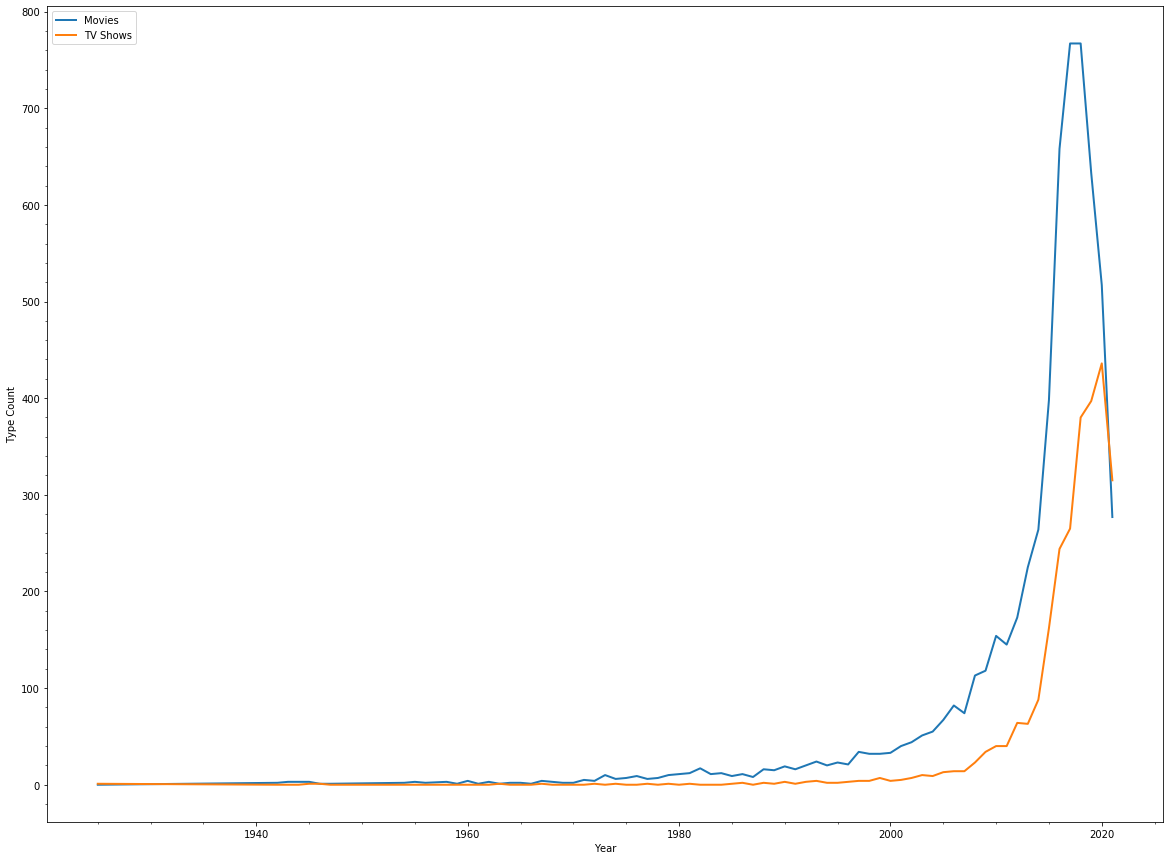

In [27]:
plt.figure(figsize=(20,15))
movie_plot = plt.plot(years, movies_ot, linewidth = 2)
show_plot = plt.plot(years, tvshow_ot, linewidth = 2)

plt.legend(['Movies', 'TV Shows'])
plt.xlabel('Year')
plt.ylabel('Type Count')
plt.minorticks_on()

### Content Age Ratings O.T

In [57]:
# Seperating data into ratings 
ratings = [len(df_nona.loc[df_nona['rating']== 'TV-14']), len(df_nona.loc[df_nona['rating']== 'PG-13']), len(df_nona.loc[df_nona['rating']== 'PG']), len(df_nona.loc[df_nona['rating']== 'R']),
           len(df_nona.loc[df_nona['rating']== 'TV-PG']), len(df_nona.loc[df_nona['rating']== 'G']), len(df_nona.loc[df_nona['rating']== 'TV-Y7']), len(df_nona.loc[df_nona['rating']== 'TV-G']),
           len(df_nona.loc[df_nona['rating']== 'TV-Y']),len(df_nona.loc[df_nona['rating']== 'NC-17']), len(df_nona.loc[df_nona['rating']== 'NR']), len(df_nona.loc[df_nona['rating']== 'TV-Y7-FV']), 
           len(df_nona.loc[df_nona['rating']== 'UR'])]

total = len(df_nona)
ratings_name = ['TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7', 'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']

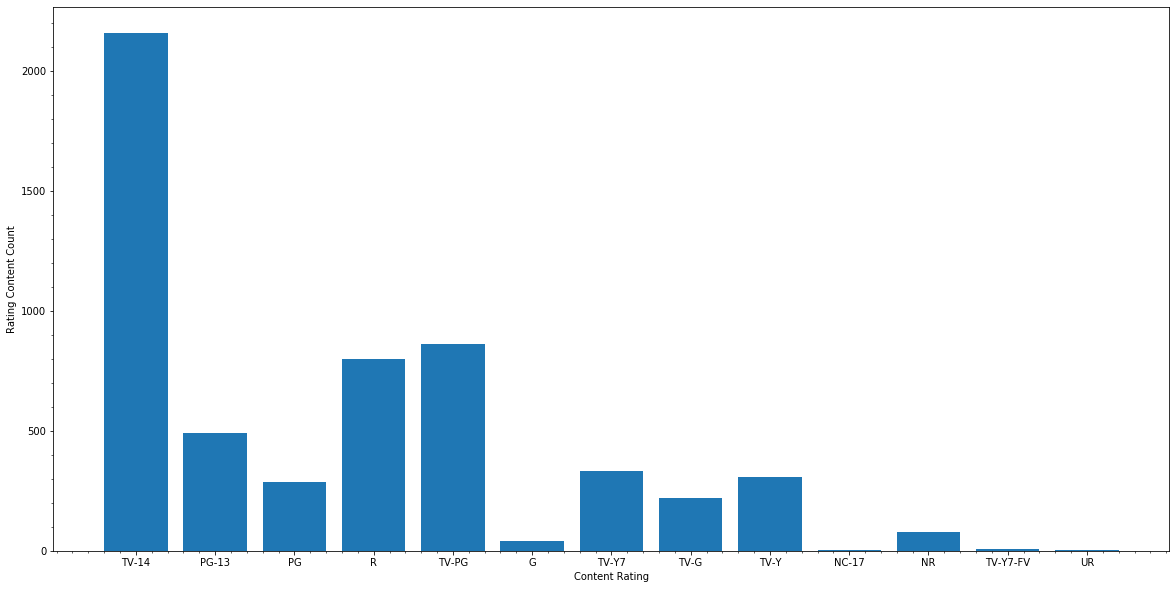

In [67]:
# Bar plots
plt.figure(figsize=(20,10))
plt.bar(ratings_name, ratings)

plt.xlabel('Content Rating')
plt.ylabel('Rating Content Count')
plt.minorticks_on()